# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {TEAM_GM1_#MODELBULDERS}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [499]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 0.1 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [500]:
df = pd.read_csv('df_train.csv') # load the data
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [501]:
# look at data statistics
df.describe()
#testing

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [502]:
df.shape

(8763, 49)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [504]:
df.isnull().sum().sum()

2068

In [505]:
df.duplicated().sum()

0

# Exploring the categorical features

In [506]:
df['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'level_5'),
  Text(1, 0, 'level_10'),
  Text(2, 0, 'level_9'),
  Text(3, 0, 'level_8'),
  Text(4, 0, 'level_7'),
  Text(5, 0, 'level_6'),
  Text(6, 0, 'level_4'),
  Text(7, 0, 'level_3'),
  Text(8, 0, 'level_1'),
  Text(9, 0, 'level_2')])

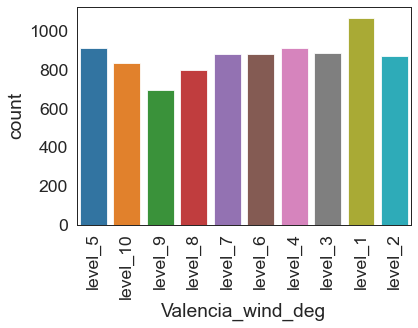

In [507]:
sns.countplot(x='Valencia_wind_deg', data=df)
plt.xticks(rotation=90)

In [508]:
df['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'sp25'),
  Text(1, 0, 'sp23'),
  Text(2, 0, 'sp24'),
  Text(3, 0, 'sp21'),
  Text(4, 0, 'sp16'),
  Text(5, 0, 'sp9'),
  Text(6, 0, 'sp15'),
  Text(7, 0, 'sp19'),
  Text(8, 0, 'sp22'),
  Text(9, 0, 'sp11'),
  Text(10, 0, 'sp8'),
  Text(11, 0, 'sp4'),
  Text(12, 0, 'sp6'),
  Text(13, 0, 'sp13'),
  Text(14, 0, 'sp17'),
  Text(15, 0, 'sp20'),
  Text(16, 0, 'sp18'),
  Text(17, 0, 'sp14'),
  Text(18, 0, 'sp12'),
  Text(19, 0, 'sp5'),
  Text(20, 0, 'sp10'),
  Text(21, 0, 'sp7'),
  Text(22, 0, 'sp3'),
  Text(23, 0, 'sp2'),
  Text(24, 0, 'sp1')])

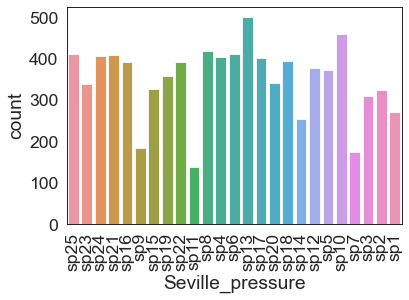

In [509]:
sns.countplot(x='Seville_pressure', data=df)
plt.xticks(rotation=90)

# plotting relevant feature interactions

<function matplotlib.pyplot.show(close=None, block=None)>

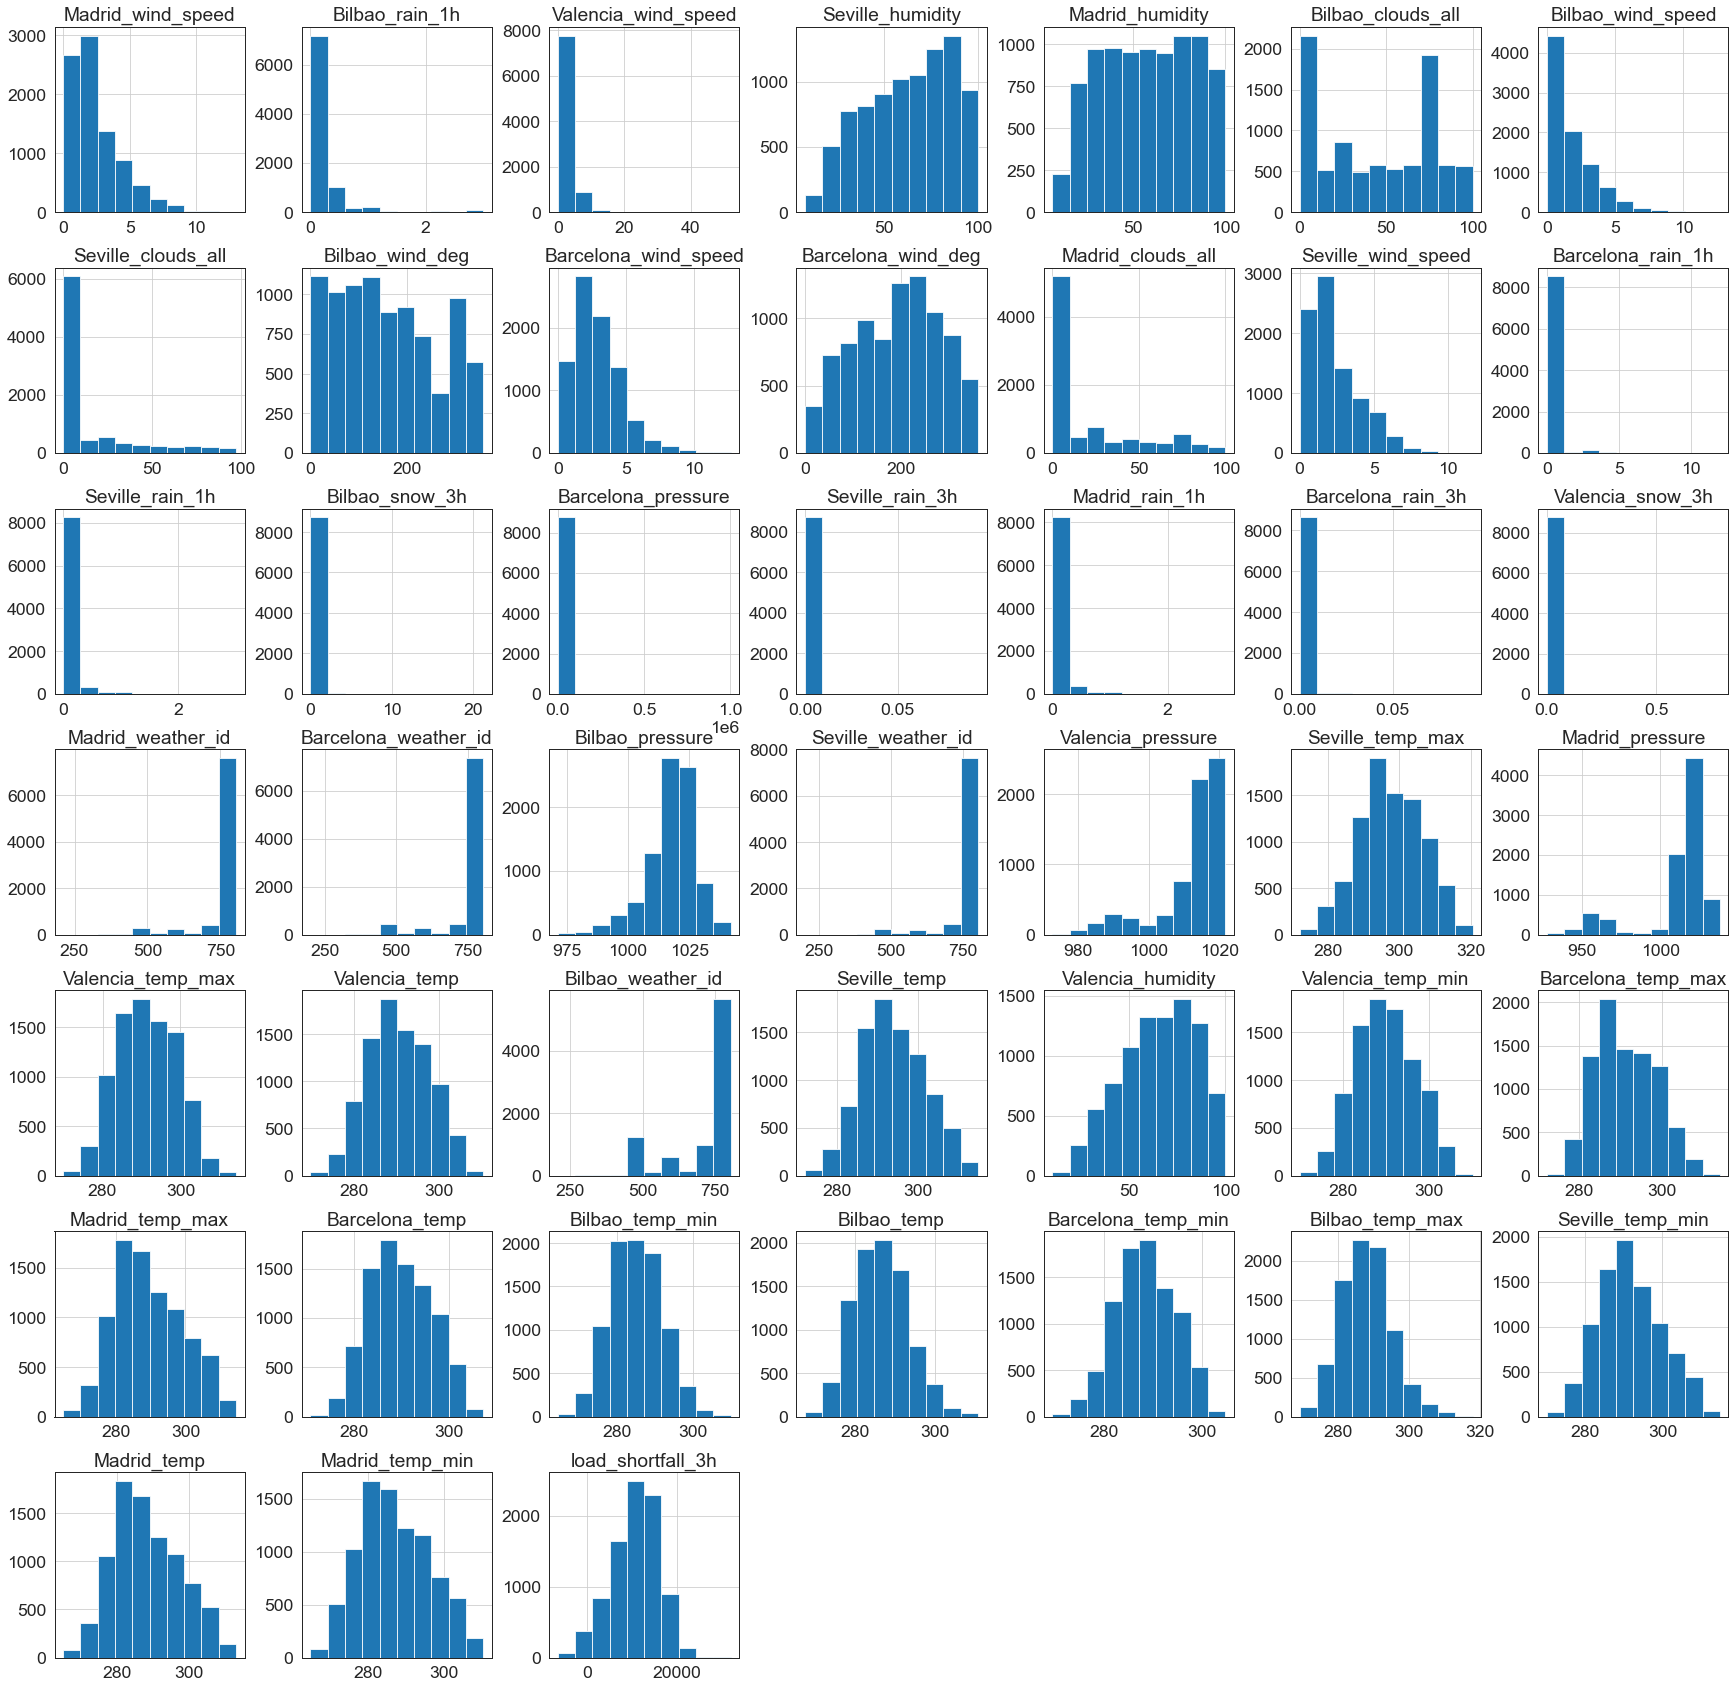

In [510]:
df = df.drop(columns=['Unnamed: 0'])
df.hist(figsize=(30,30)) 
plt.show

# Checking for Outliers

In [511]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Bilbao_rain_1h,
Valencia_wind_speed,
Bilbao_wind_speed,
Barcelona_rain_1h,
Seville_rain_1h,           
Bilbao_snow_3h,         
Barcelona_pressure,     
Seville_rain_3h,          
Madrid_rain_1h ,          
Barcelona_rain_3h ,      
Valencia_snow_3h ,    
Madrid_weather_id ,      
Barcelona_weather_id,
Seville_weather_id ,       
THE FOLLOWING FEATURES CONTAINS OUTLIERS

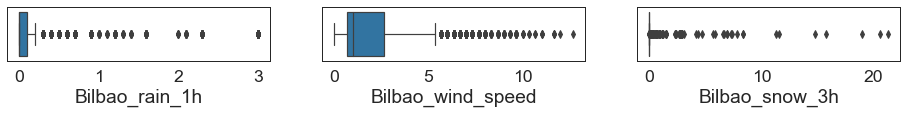

In [512]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Bilbao_rain_1h'])
plt.subplot(1,3,2)
sns.boxplot(df['Bilbao_wind_speed'])
plt.subplot(1,3,3)
sns.boxplot(df['Bilbao_snow_3h'])
plt.show()

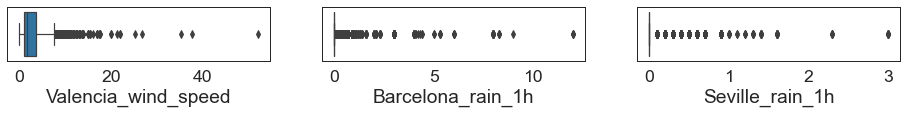

In [513]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Valencia_wind_speed'])
plt.subplot(1,3,2)
sns.boxplot(df['Barcelona_rain_1h'])
plt.subplot(1,3,3)
sns.boxplot(df['Seville_rain_1h'])
plt.show()

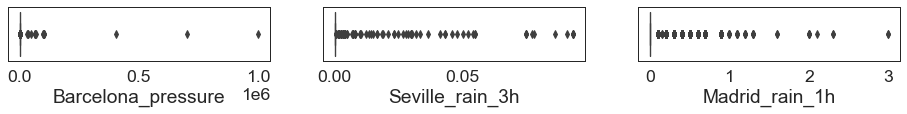

In [514]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Barcelona_pressure'])
plt.subplot(1,3,2)
sns.boxplot(df['Seville_rain_3h'])
plt.subplot(1,3,3)
sns.boxplot(df['Madrid_rain_1h'])
plt.show()

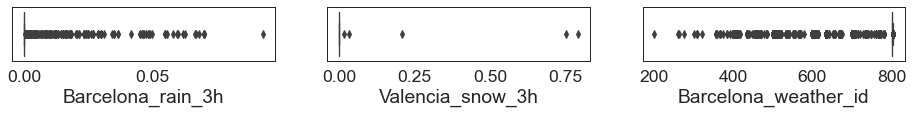

In [515]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df['Barcelona_rain_3h'])
plt.subplot(1,3,2)
sns.boxplot(df['Valencia_snow_3h'])
plt.subplot(1,3,3)
sns.boxplot(df['Barcelona_weather_id'])
plt.show()

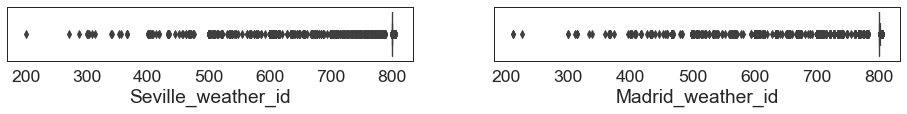

In [516]:
plt.figure(figsize=(16,1))
plt.subplot(1,2,1)
sns.boxplot(df['Seville_weather_id'])
plt.subplot(1,2,2)
sns.boxplot(df['Madrid_weather_id'])
plt.show()

# Correlation

In [517]:
df.corr().head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed             1.000000        0.259719             0.513092   
Bilbao_rain_1h                0.259719        1.000000             0.265864   
Valencia_wind_speed           0.513092        0.265864             1.000000   
Seville_humidity             -0.117892        0.069878            -0.075227   
Madrid_humidity              -0.137092        0.106765            -0.019388   

                     Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed           -0.117892        -0.137092           0.244001   
Bilbao_rain_1h               0.069878         0.106765           0.370733   
Valencia_wind_speed         -0.075227        -0.019388           0.210524   
Seville_humidity             1.000000         0.799831           0.061680   
Madrid_humidity              0.799831         1.000000           0.041878   

                     Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
Madrid_wind_speed             0.377854            0.191251         0.270950   
Bilbao_rain_1h                0.085398            0.081131         0.279350   
Valencia_wind_speed           0.386478            0.163675         0.248643   
Seville_humidity             -0.088180            0.399436        -0.087246   
Madrid_humidity              -0.016808            0.374112        -0.069570   

                     Barcelona_wind_speed  ...  Madrid_temp_max  \
Madrid_wind_speed                0.294640  ...         0.091464   
Bilbao_rain_1h                   0.069997  ...        -0.148397   
Valencia_wind_speed              0.347966  ...        -0.021970   
Seville_humidity                -0.138625  ...        -0.708937   
Madrid_humidity                 -0.058518  ...        -0.803260   

                     Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
Madrid_wind_speed          0.080133         0.077330     0.060467   
Bilbao_rain_1h            -0.138901        -0.141269    -0.182494   
Valencia_wind_speed       -0.021456        -0.010166    -0.022676   
Seville_humidity          -0.617797        -0.605493    -0.604733   
Madrid_humidity           -0.684867        -0.635760    -0.634825   

                     Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
Madrid_wind_speed              0.089992         0.042114          0.110278   
Bilbao_rain_1h                -0.106593        -0.219871         -0.120575   
Valencia_wind_speed            0.001413        -0.033271          0.003618   
Seville_humidity              -0.595065        -0.583718         -0.784850   
Madrid_humidity               -0.636777        -0.611395         -0.769591   

                     Madrid_temp  Madrid_temp_min  load_shortfall_3h  
Madrid_wind_speed       0.109572         0.098138          -0.150981  
Bilbao_rain_1h         -0.135927        -0.116431          -0.152510  
Valencia_wind_speed    -0.011982        -0.019742          -0.142791  
Seville_humidity       -0.717171        -0.688664          -0.167290  
Madrid_humidity        -0.802605        -0.759633          -0.150536  

[5 rows x 45 columns]

<AxesSubplot:>

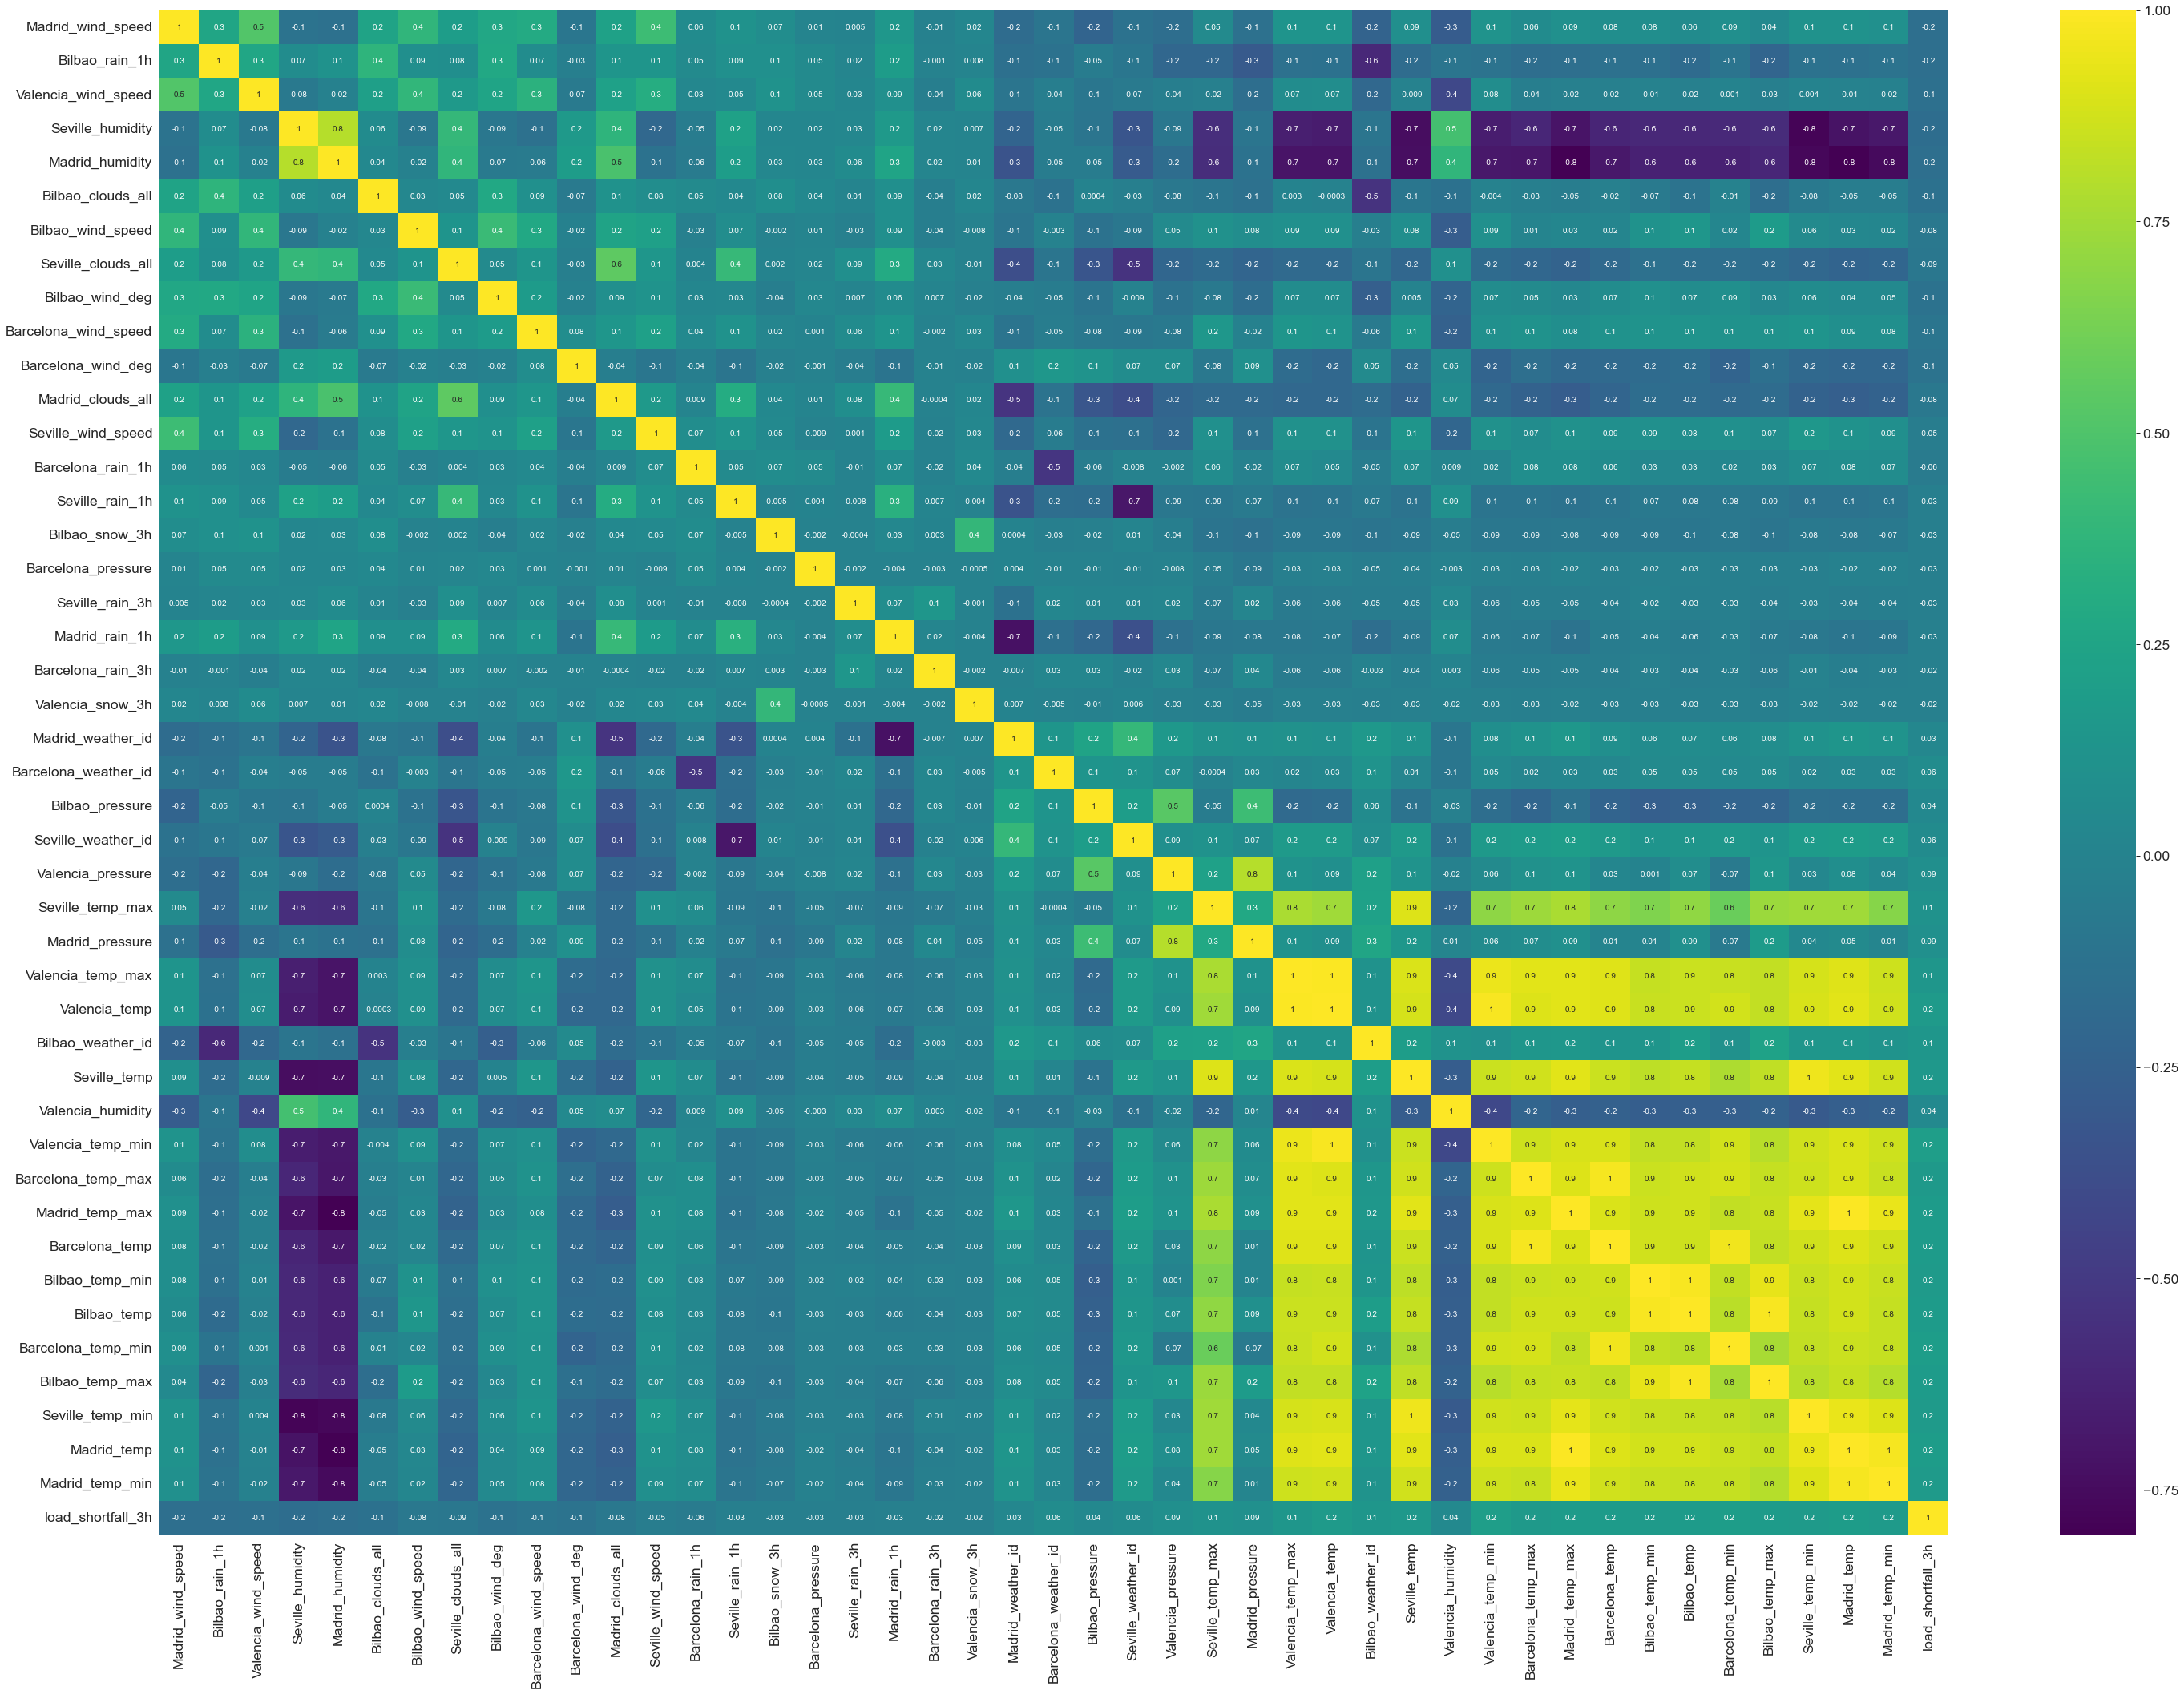

In [518]:
# evaluate correlation
plt.figure(figsize=(50,35))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt='.1g')


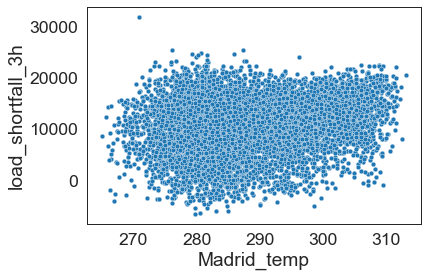

In [519]:
sns.scatterplot(x='Madrid_temp',y='load_shortfall_3h', data=df);

correlation **

In [520]:
# Feature Distributions

In [521]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

Madrid_wind_speed        
Bilbao_rain_1h           
Valencia_wind_speed
Bilbao_wind_speed        
Seville_clouds_all
Barcelona_wind_speed
Madrid_clouds_all       
Seville_wind_speed      
Barcelona_rain_1h        
Seville_rain_1h          
Bilbao_snow_3h          
Barcelona_pressure     
Seville_rain_3h        
Madrid_rain_1h          
Barcelona_rain_3h       
Valencia_snow_3h       
Madrid_weather_id      
Barcelona_weather_id    
Seville_weather_id     
Valencia_pressure      
Madrid_pressure         
Bilbao_weather_id   

They highlighted a symmetrical distribution since their skew level is above 1

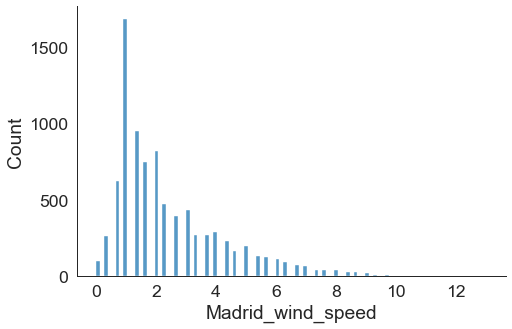

In [522]:
# have a look at feature distributions
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Madrid_wind_speed", kind="hist", bins = 100, aspect = 1.5)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

# Handling missing values

In [523]:
# remove missing values
df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)

In [524]:
# remove missing features
df =df.drop(columns=['time'])
df = df.drop(columns=['Valencia_wind_deg', 'Seville_pressure'])

In [525]:
# create new features

In [526]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [527]:
# split predictors and response
X = df.drop(['load_shortfall_3h'], axis=1)
y = df['load_shortfall_3h']


In [528]:
# create model object
lm = LinearRegression()

In [529]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [531]:
#Instantiate the model
lm.fit(X_train, y_train)

LinearRegression()

In [532]:
# create targets and features dataset
formula_str = df.columns[44]+' ~ '+'+'.join(df.columns[1:]); formula_str

'load_shortfall_3h ~ Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp+Madrid_temp_min+load_shortfall_3h'

In [533]:
model=sm.ols(formula=formula_str, data=df)

In [534]:
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.032e+27
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:35:09   Log-Likelihood:             1.6664e+05
No. Observations:                8763   AIC:                        -3.332e+05
Df Residuals:                    8718   BIC:                        -3.329e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.004e-11 

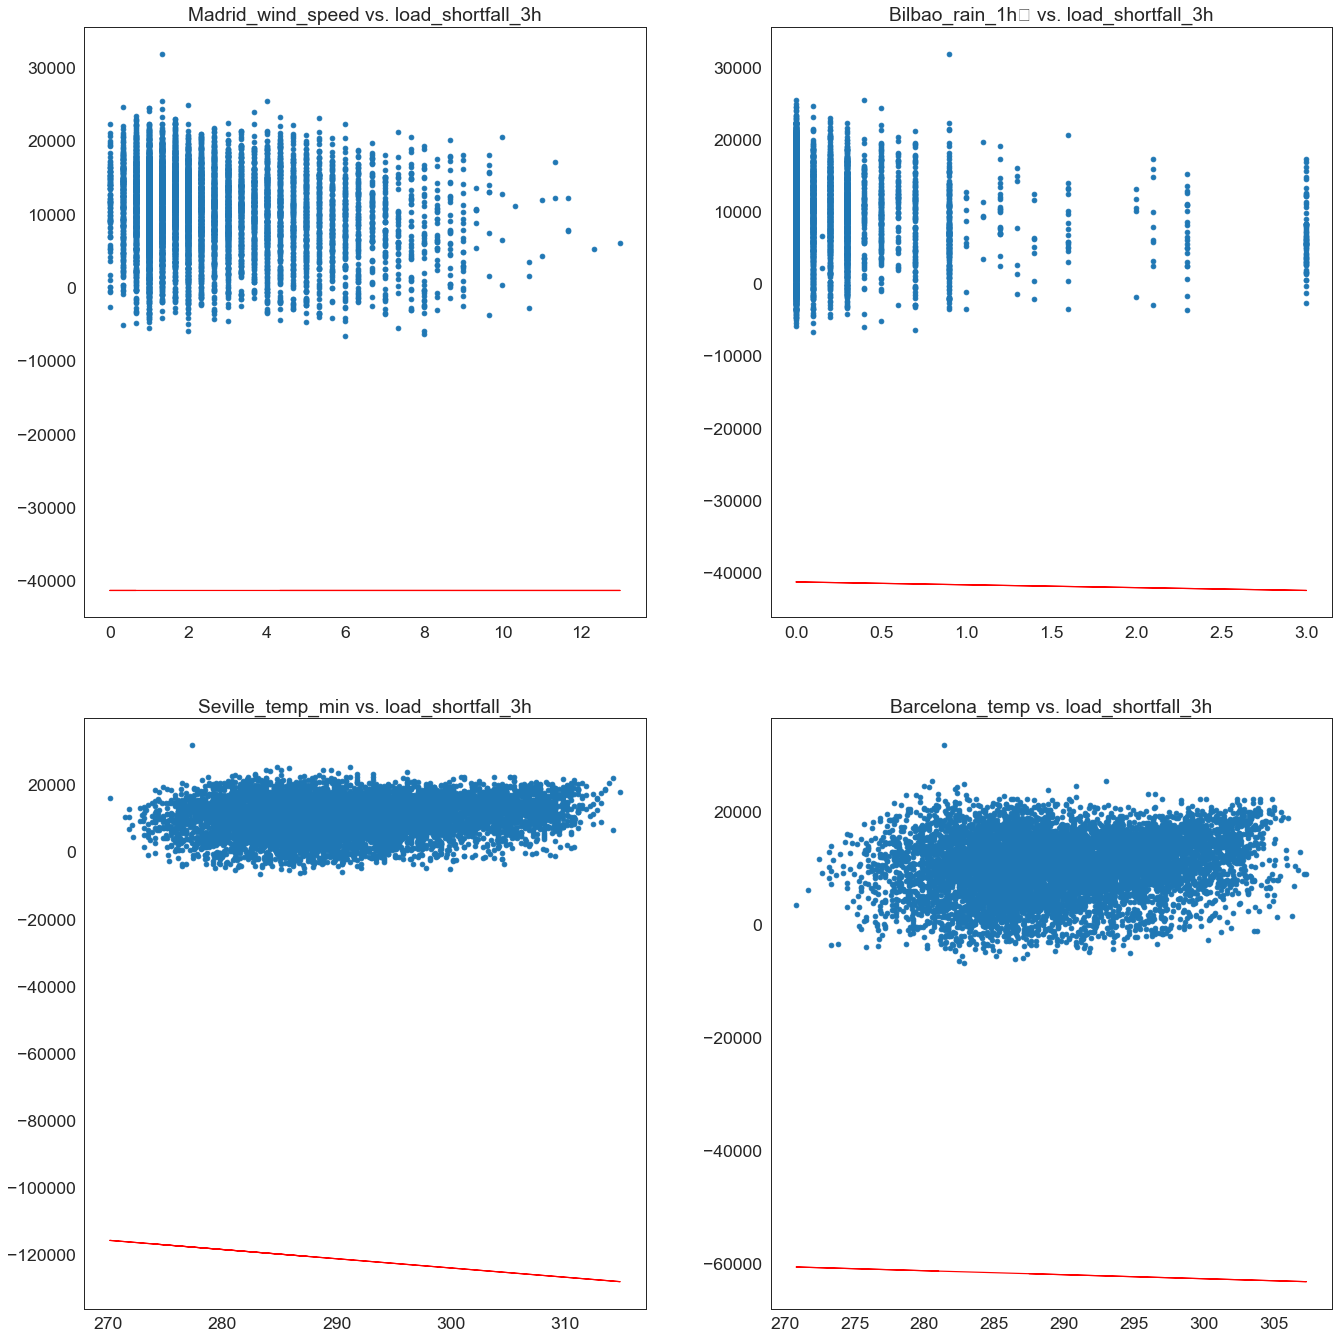

In [535]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0,0].scatter(df['Madrid_wind_speed'], df['load_shortfall_3h'])
axs[0,0].plot(df['Madrid_wind_speed'], lm.intercept_ + lm.coef_[4]*df['Madrid_wind_speed'], color='red')
axs[0,0].title.set_text('Madrid_wind_speed vs. load_shortfall_3h')

axs[0,1].scatter(df['Bilbao_rain_1h'], df['load_shortfall_3h'])
axs[0,1].plot(df['Bilbao_rain_1h'], lm.intercept_ + lm.coef_[1]*df['Bilbao_rain_1h'], color='red')
axs[0,1].title.set_text('Bilbao_rain_1h	 vs. load_shortfall_3h')

axs[1,0].scatter(df['Seville_temp_min'], df['load_shortfall_3h'])
axs[1,0].plot(df['Seville_temp_min'], lm.intercept_ + lm.coef_[0]*df['Seville_temp_min'], color='red')
axs[1,0].title.set_text('Seville_temp_min vs. load_shortfall_3h')

axs[1,1].scatter(df['Barcelona_temp'], df['load_shortfall_3h'])
axs[1,1].plot(df['Barcelona_temp'], lm.intercept_ + lm.coef_[2]*df['Barcelona_temp'], color='red')
axs[1,1].title.set_text('Barcelona_temp vs. load_shortfall_3h')


fig.tight_layout(pad=3.0)

plt.show()

In [536]:
test_pred = [lm.predict(X_test)]

In [537]:
print(test_pred)

[array([12104.75446342, 11252.44824073, 11148.98698326, ...,
        9397.1789192 , 12454.6243972 ,  7316.88249262])]


In [538]:
# create one or more ML models

In [539]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [540]:
# Compare model performance

In [541]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [542]:
# discuss chosen methods logic